In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/misra/Energy_consumption.csv")
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,01-01-2022 00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,01-01-2022 01:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,01-01-2022 02:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,01-01-2022 03:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,01-01-2022 04:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [3]:
df.shape

(1000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [5]:
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015974,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [6]:
df.isnull().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True, errors='coerce')

df['Hour'] = df['Timestamp'].dt.hour
df['Month'] = df['Timestamp'].dt.month

df.drop('Timestamp', axis=1, inplace=True)

print(df.head())

   Temperature   Humidity  SquareFootage  Occupancy HVACUsage LightingUsage  \
0    25.139433  43.431581    1565.693999          5        On           Off   
1    27.731651  54.225919    1411.064918          1        On            On   
2    28.704277  58.907658    1755.715009          2       Off           Off   
3    20.080469  50.371637    1452.316318          1       Off            On   
4    23.097359  51.401421    1094.130359          9        On           Off   

   RenewableEnergy  DayOfWeek Holiday  EnergyConsumption  Hour  Month  
0         2.774699     Monday      No          75.364373     0      1  
1        21.831384   Saturday      No          83.401855     1      1  
2         6.764672     Sunday      No          78.270888     2      1  
3         8.623447  Wednesday      No          56.519850     3      1  
4         3.071969     Friday      No          70.811732     4      1  


In [8]:
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday','Sunday']).astype(int)
df[['DayOfWeek','IsWeekend']].head()

,DayOfWeek,IsWeekend
0,Monday,0
1,Saturday,1
2,Sunday,1
3,Wednesday,0
4,Friday,0


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols = ['HVACUsage','LightingUsage','Holiday','DayOfWeek']

for c in cat_cols:
    df[c] = le.fit_transform(df[c])
    
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Month,IsWeekend
0,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373,0,1,0
1,27.731651,54.225919,1411.064918,1,1,1,21.831384,2,0,83.401855,1,1,1
2,28.704277,58.907658,1755.715009,2,0,0,6.764672,3,0,78.270888,2,1,1
3,20.080469,50.371637,1452.316318,1,0,1,8.623447,6,0,56.519850,3,1,0
4,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,0,70.811732,4,1,0


In [10]:
Q1 = df['EnergyConsumption'].quantile(0.25)
Q3 = df['EnergyConsumption'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['EnergyConsumption'] >= Q1 - 1.5*IQR) &
        (df['EnergyConsumption'] <= Q3 + 1.5*IQR)]

In [11]:
X = df.drop('EnergyConsumption', axis=1)
y = df['EnergyConsumption']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

lr = LinearRegression()
rf = RandomForestRegressor()

lr.fit(X_train,y_train)
rf.fit(X_train,y_train)

print("Linear Regression R2:", r2_score(y_test, lr.predict(X_test)))
print("Random Forest R2:", r2_score(y_test, rf.predict(X_test)))

Linear Regression R2: 0.5888145142881606
Random Forest R2: 0.5077140761658175


In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,200],
    'max_depth':[3,5],
    'learning_rate':[0.05,0.1]
}

xgb = XGBRegressor()

grid = GridSearchCV(xgb, params, cv=3, scoring='r2')
grid.fit(X_train, y_train)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(**grid.best_params_))
])

pipe.fit(X_train, y_train)

best_model = pipe

print("Best Parameters:", grid.best_params_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [14]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(y_test, y_pred))
print("XGBoost R2:", r2_score(y_test, y_pred))

MAE: 4.2545534115875006
XGBoost R2: 0.5317437869755469


In [15]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 5.374514759514001


In [16]:
error_pct = rmse / y_test.mean() * 100
print("Average Prediction Error %:", error_pct)

Average Prediction Error %: 7.046207712673736


In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, cv=5)
print("Cross Validation Mean R2:", scores.mean())

Cross Validation Mean R2: 0.5737609412867838


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

models = {
    "Linear Regression": lr,
    "Random Forest": rf,
    "XGBoost": best_model
}

results = []

for name, model in models.items():
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append([name, mae, rmse, r2])

comparison = pd.DataFrame(results, columns=["Model","MAE","RMSE","R2"])
comparison

,Model,MAE,RMSE,R2
0,Linear Regression,3.941031,5.036355,0.588815
1,Random Forest,4.393535,5.510693,0.507714
2,XGBoost,4.254553,5.374515,0.531744


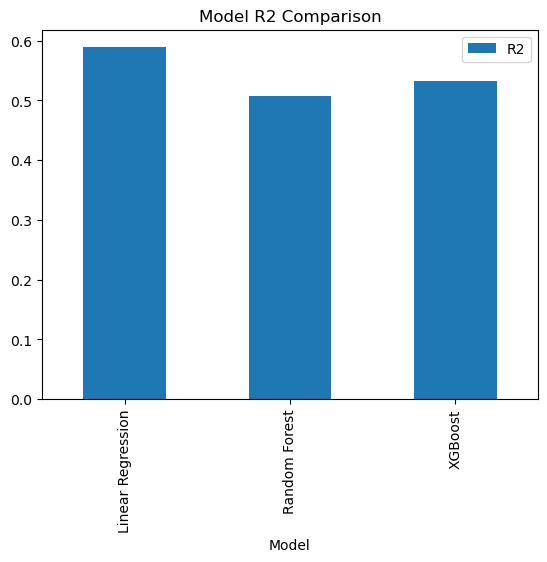

In [19]:
comparison.set_index("Model")[["R2"]].plot(kind="bar")
plt.title("Model R2 Comparison")
plt.show()

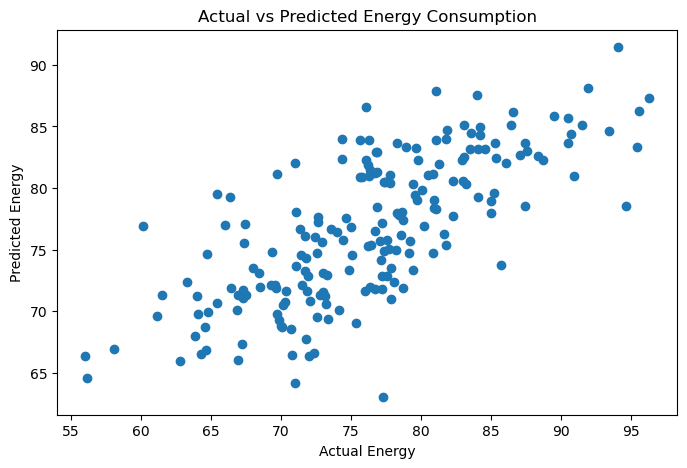

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy")
plt.ylabel("Predicted Energy")
plt.title("Actual vs Predicted Energy Consumption")
plt.show()

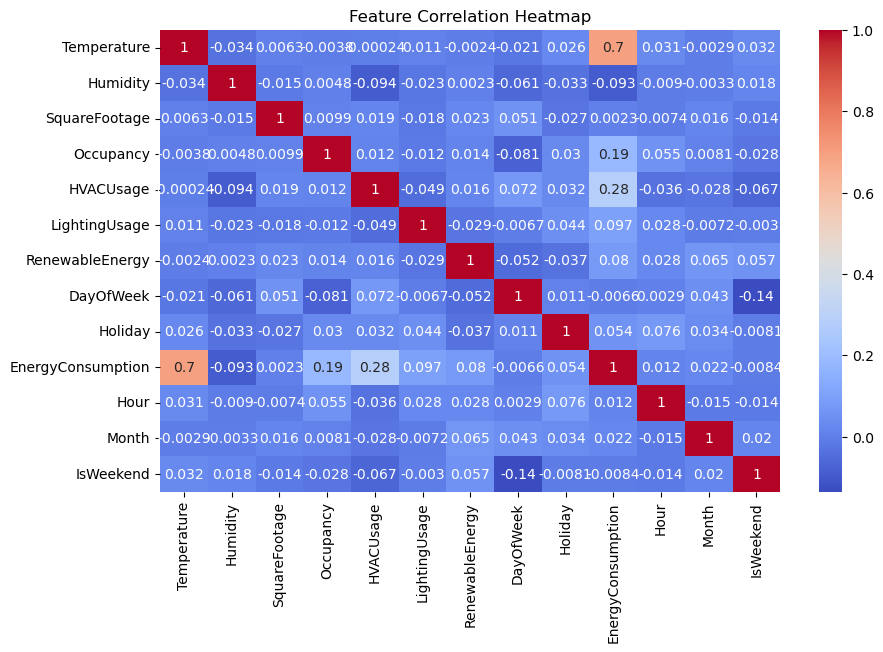

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

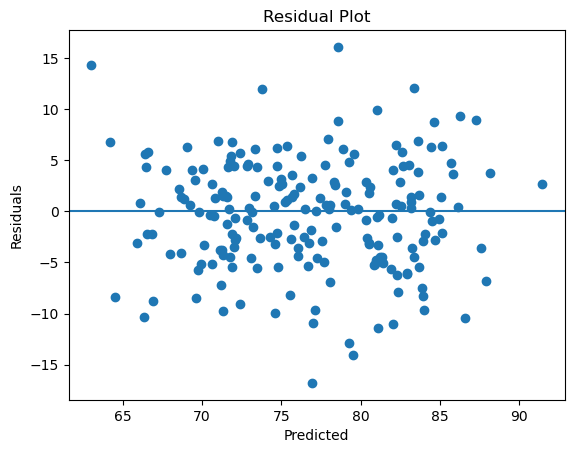

In [22]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [23]:
print("Residual Mean:", residuals.mean())
print("Residual Std:", residuals.std())

Residual Mean: -0.36336081590527364
Residual Std: 5.37567364648058


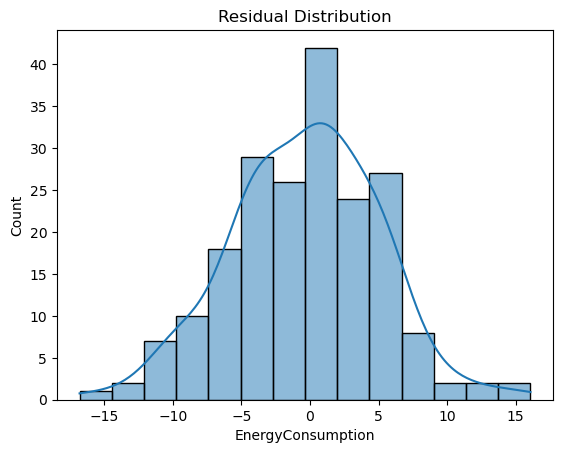

In [24]:
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

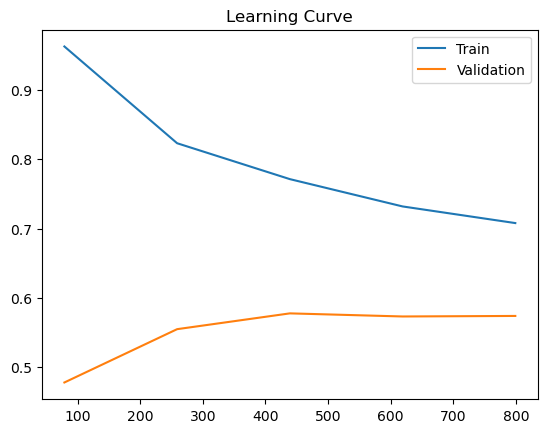

In [25]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, scoring='r2'
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation")
plt.legend()
plt.title("Learning Curve")
plt.show()

ValueError: Invalid color skull

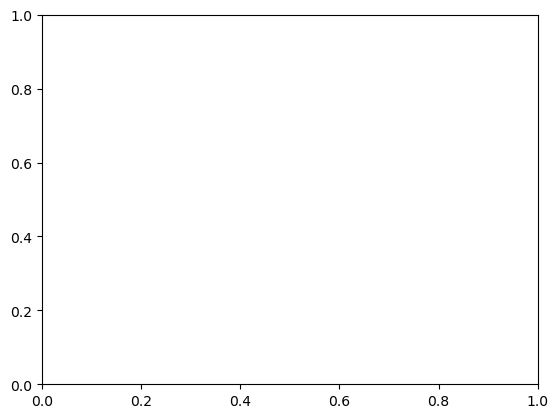

In [35]:
xgb_model = best_model.named_steps['model']

feat_imp = pd.Series(xgb_model.feature_importances_, index=X.columns)

feat_imp.sort_values(ascending=False).head(10).plot(kind='barh' , color = 'skull')
plt.title("Top 10 Important Features")
plt.show()

In [ ]:
import joblib

joblib.dump(best_model, "energy_model.pkl")

In [ ]:
sample = X_test.iloc[0:1]
pred = best_model.predict(sample)[0]

print("Predicted Energy:", pred)

if pred > df['EnergyConsumption'].mean():
    print("High consumption predicted.")
    print("- Reduce HVAC usage")
    print("- Turn off unused lighting")
    print("- Shift appliances to off-peak hours")
else:
    print("Energy usage is eco-friendly.")
    
eco_sample = sample.copy()
eco_sample['HVACUsage'] = 0
eco_sample['LightingUsage'] = 0

eco_pred = best_model.predict(eco_sample)[0]

print("\nOriginal:", pred)
print("Eco Optimized:", eco_pred)

In [ ]:
reduction = (pred - eco_pred) / pred * 100
print("Energy Reduction %:", reduction)

In [ ]:
sample_house = X.iloc[0:1]
future_energy = best_model.predict(sample_house)

print("Future Energy Prediction:", future_energy[0])

In [ ]:
feat_imp.sort_values(ascending=False).to_csv("feature_importance.csv")
print ("Done!")